In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import os
os.chdir('E:\mining\DATA SET')

In [7]:
data = pd.read_excel('TieuDuong.xlsx')

In [8]:
data.sample(10)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Unnamed: 8
684,5,136,82,0,0,0.0,0.640,69,0
664,6,115,60,39,0,33.7,0.245,40,1
124,0,113,76,0,0,33.3,0.278,23,1
586,8,143,66,0,0,34.9,0.129,41,1
397,0,131,66,40,0,34.3,0.196,22,1
572,3,111,58,31,44,29.5,0.430,22,0
5,5,116,74,0,0,25.6,0.201,30,0
369,1,133,102,28,140,32.8,0.234,45,1
168,4,110,66,0,0,31.9,0.471,29,0
221,2,158,90,0,0,31.6,0.805,66,1


<AxesSubplot:title={'center':'Scatter'}, xlabel='Diastolic blood pressure (mm Hg)', ylabel='Body mass index (weight in kg/(height in m)^2)'>

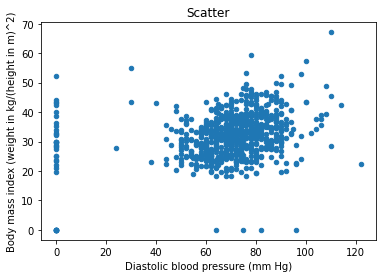

In [9]:
data.plot(kind='scatter',x='Diastolic blood pressure (mm Hg)',
          y='Body mass index (weight in kg/(height in m)^2)',title='Scatter')


In [10]:
df=data[['Diastolic blood pressure (mm Hg)','Body mass index (weight in kg/(height in m)^2)']]
df.sample(10)

,Diastolic blood pressure (mm Hg),Body mass index (weight in kg/(height in m)^2)
141,82,39.5
506,90,36.5
701,78,27.6
488,72,25.6
658,106,39.0
95,72,33.9
600,88,27.1
477,76,23.8
338,78,34.2
78,0,43.2


In [11]:
# chọn số cụm bằng pp Elbow 
sum_of_squared_distances=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


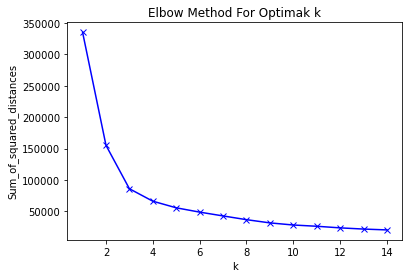

In [12]:
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method For Optimak k")
plt.show()

In [13]:
km3 = KMeans(n_clusters = 3)
km3 = km3.fit(df)
labels = km3.labels_
labels = pd.DataFrame(labels, columns = ["cluster"])
df_clustered = pd.concat([df,labels], axis = 1)

In [14]:
df_clustered.groupby("cluster").size()

cluster
0    308
1     38
2    422
dtype: int64

In [15]:
centroids = km3.cluster_centers_ 
centroids = pd.DataFrame(centroids,columns =['Centroids Diastolic blood pressure (mm Hg)',
                                             'Centroids Body mass index (weight in kg/(height in m)^2)'])
centroids

,Centroids Diastolic blood pressure (mm Hg),Centroids Body mass index (weight in kg/(height in m)^2)
0,83.551948,35.330519
1,2.210526,26.994737
2,64.585308,30.006398


<AxesSubplot:xlabel='Centroids Diastolic blood pressure (mm Hg)', ylabel='Centroids Body mass index (weight in kg/(height in m)^2)'>

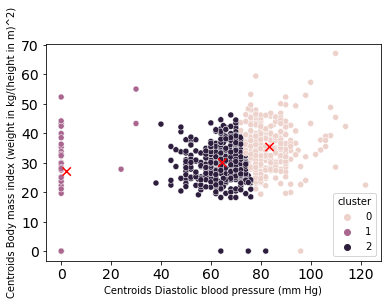

In [16]:
import seaborn as sns
s1=sns.scatterplot(data=df_clustered,x='Diastolic blood pressure (mm Hg)',
                   y='Body mass index (weight in kg/(height in m)^2)',hue = 'cluster')
centroids.plot(ax=s1, kind='scatter', x='Centroids Diastolic blood pressure (mm Hg)',
               y='Centroids Body mass index (weight in kg/(height in m)^2)', 
               color = 'red', fontsize=14, marker='x', s=[70,70,70])

In [17]:
km5 = KMeans(n_clusters = 5)
km5 = km5.fit(df)
labels = km5.labels_
labels = pd.DataFrame(labels, columns = ["cluster"])
df_cluster = pd.concat([df,labels], axis = 1)

In [18]:
df_cluster.groupby("cluster").size()

cluster
0    200
1    146
2     36
3    179
4    207
dtype: int64

In [19]:
centroids5 = km5.cluster_centers_ 
centroids5 = pd.DataFrame(centroids5,columns =['Centroids Diastolic blood pressure (mm Hg)',
                                             'Centroids Body mass index (weight in kg/(height in m)^2)'])
centroids5

,Centroids Diastolic blood pressure (mm Hg),Centroids Body mass index (weight in kg/(height in m)^2)
0,58.105000,29.780000
1,89.719178,35.452740
2,0.666667,25.763889
3,72.737430,26.157542
4,73.956522,37.818841


<AxesSubplot:xlabel='Centroids Diastolic blood pressure (mm Hg)', ylabel='Centroids Body mass index (weight in kg/(height in m)^2)'>

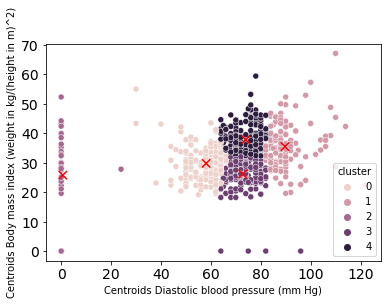

In [20]:
import seaborn as sns
s1=sns.scatterplot(data=df_cluster,x='Diastolic blood pressure (mm Hg)',
                   y='Body mass index (weight in kg/(height in m)^2)',hue = 'cluster')
centroids5.plot(ax=s1, kind='scatter', x='Centroids Diastolic blood pressure (mm Hg)',
               y='Centroids Body mass index (weight in kg/(height in m)^2)', 
               color = 'red', fontsize=14, marker='x',s=[70,70,70,70,70])

In [21]:
from scipy.spatial.distance import cdist 

In [29]:
# khởi tạo các centers ban đầu
def kmeans_init_centers(df, k):
    # randomly pick k rows of X as initial centers
    return df[np.random.choice(df.shape[0], k, replace=False)]

# gán nhãn mới cho các điểm khi biết các centers
def kmeans_assign_labels(df, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(df, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# cập nhập các centers mới trên dữ liệu đã được gán nhãn
def kmeans_update_centers(df, labels, K):
    centers = np.zeros((K, df.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = df[labels == k, :]
        # take average
        centers[k,:] = np.mean(dfk, axis = 0)
    return centers

# kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [30]:
def kmeans(df, K):
    centers = [kmeans_init_centers(df, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(df, centers[-1]))
        new_centers = kmeans_update_centers(df, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [ ]:
(centers, labels, it) = kmeans(df, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(df, labels[-1])